# A Python Lecture Series


#### by Luca Mingarelli

# Lecture 2
## Content:

   - I/O
   - Modules
   - NumPy and SciPy
   - Pandas
   - Matplotlib
   - Importing data from the web
   

## Input/Output

To write in a file:

In [1]:
f = open('a_work_file', 'w') # opens the file workfile
#more specifically it creates a file object
f.write('This is a test\n')   
for n in range(5):
    f.write(str(n)+'\n')
f.close() 

In [2]:
import os
os.path.exists('a_work_file')

True

To read from a file:

In [3]:
f = open('a_work_file', 'r')
s = f.read()
print(s)
f.close()

This is a test
0
1
2
3
4



### Iterating over a file
For reading lines from a file, you can loop over the file object. This is memory efficient, fast, and leads to simple code.

In [4]:
f = open('a_work_file', 'r')
for line in f:
    print(line,end = '')
f.close()

This is a test
0
1
2
3
4


### File modes

   - Read-only: `r`
   - Write-only: `w`
     - Note: Create a new file or overwrite existing file.
   - Append to a file: `a`
   - Read and Write: `r+`
   - Binary mode: `b`

It is good practice to use the `with` keyword when dealing with file objects. The advantage is that the file is properly closed after its suite finishes, even if an exception is raised at some point (using `with` is also much shorter than writing equivalent try-finally blocks).

In [5]:
with open('A_new_test','w') as f:
    f.write('This is a NEW test\n\n')   
    for n in range(6):
        f.write(f'{n} squared is {n**2}\n') # A formatted string - notice the 'f' at the beginning of the string

In [6]:
with open('A_new_test','r') as f:
    print(f.read())

This is a NEW test

0 squared is 0
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25



## Modules
#### i.e. how to write reusable code

A module is a file containing Python definitions and statements. The file name is the module name with the suffix `.py` appended.

In [7]:
%%writefile my_new_module.py

def a_complicated_function():
    print("Working... Done.")

Overwriting my_new_module.py


In [8]:
# import my_new_module as mnm
from my_new_module import a_complicated_function
a_complicated_function()

Working... Done.


In [9]:
os.makedirs('MODULES', exist_ok=True)

In [10]:
%%writefile MODULES/module2.py
def function2():
    print("Working... Done.")

Overwriting MODULES/module2.py


We could now call this as `MODULES.module2.function2`. However, to make our life easier we can instead write the following `__init__.py` file (notice the `.`!):

In [11]:
%%writefile MODULES/__init__.py
from .module2 import function2

Overwriting MODULES/__init__.py


In [12]:
import MODULES as MD
MD.function2()

Working... Done.


Most of the useful operations needed for scientific computing are contained within some module (e.g. **NumPy**, **SciPy**, etc.).

This means that in order to access them we will need to import that module as

- `import module`,

or giving it an alias as

- `import module as md`.

Then we will be able to call the function as `module.specific_function()` or as `md.specific_function()`. Alternatively we can import the required tool/function as

- `from module import specific_funtion`.

## NumPy and its arrays

**NumPy** provides an efficient extension package to Python for multidimensional arrays.

In [13]:
import numpy as np
x = np.array([1,2,3])
# convert list to numpy array object
x

array([1, 2, 3])

In [14]:
###--- Notice that
x+x
###--- More on this later.

array([2, 4, 6])

In [15]:
x = np.linspace(0,10,11) # as in Matlab!
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [16]:
x = np.arange(1.5,10,2) # same as Matlab's [1.5:2:10]
x

array([1.5, 3.5, 5.5, 7.5, 9.5])

#### NumPy's number types and associated risk (overflow)

In [17]:
x=np.array([0,1])
print("x =",x,"and has dtype", x.dtype)

x = [0 1] and has dtype int32


In [18]:
x=np.array([0,1], dtype = np.int8)
x[:] = 2**7-1
print("x =",x,"and has dtype",x.dtype)

x = [127 127] and has dtype int8


In [19]:
print("x + 1 =",x + 1,"\t (because dtype is"
      ,x.dtype,"!)")

x + 1 = [-128 -128] 	 (because dtype is int8 !)


In [20]:
x=np.array([2**63-1,2**63-1])
print("x[0] =",x[0],"and has dtype",x.dtype)
sum(x) 

x[0] = 9223372036854775807 and has dtype int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


-2

#### Some of NumPy arrays' attributes and methods

In [21]:
x.ndim

1

In [22]:
x.shape

(2,)

In [23]:
len(x)

2

In [24]:
x = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array

In [25]:
x.shape 

(2, 3)

In [26]:
x.mean() ## an ojbject's method

2.5

In [27]:
x.dtype ## data type

dtype('int32')

In [28]:
print("itemsize:", x.itemsize, "bytes")
print("nbytes:", x.nbytes, "bytes") 

itemsize: 4 bytes
nbytes: 24 bytes


#### Higher dimensional arrays

In [29]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [31]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [32]:
np.diag(range(1,5)) 

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

#### Indexing and Slicing

Recall: `x[start:stop:step]`; when any is omitted the default values are `start=0`, `stop=size`, `step=1`

In [33]:
x

array([[0, 1, 2],
       [3, 4, 5]])

In [34]:
print('x[0] = ', x[0])
print('x[1] = ', x[1])

x[0] =  [0 1 2]
x[1] =  [3 4 5]


In [35]:
x[0][-1]

2

In [36]:
x[0,-1]

2

In [37]:
x[:,::-1]

array([[2, 1, 0],
       [5, 4, 3]])

In [38]:
x[::-1,:]

array([[3, 4, 5],
       [0, 1, 2]])

In [39]:
## Notice the equivalence x[0] = x[0,:] for multidimensional arrays
print(x[0,:]) # first row of x
print(x[0])   # still first row of x

[0 1 2]
[0 1 2]


#### IMPORTANT 1: Be carefull about the datatype:

In [40]:
print('type: ',x.dtype)
x[:,:] = np.pi
x

type:  int32


array([[3, 3, 3],
       [3, 3, 3]])

In [41]:
y = x.astype(bool)
# y = y.astype(float)
print('type: ',y.dtype)
y[:,:] = np.pi
y

type:  bool


array([[ True,  True,  True],
       [ True,  True,  True]])

#### IMPORTANT 2: Slices return views, NOT copies!

In [42]:
x_slice = x[:2,:2]
x_slice  

array([[3, 3],
       [3, 3]])

In [43]:
x_slice[:] = 2
x

array([[2, 2, 3],
       [2, 2, 3]])

This behavior is quite useful: when working with large datasets, we can access and process pieces of these datasets without the need to copy the data.

#### Copying NumPy arrays

In [44]:
x[:] = 3
x_slice_copy = x[:2, :2].copy()
x_slice_copy

array([[3, 3],
       [3, 3]])

In [45]:
x_slice_copy[:] = 2
x

array([[3, 3, 3],
       [3, 3, 3]])

#### Reshaping

In [46]:
x = np.array([1, 2, 3])
# reshape to row vector
x.reshape((1, 3))

array([[1, 2, 3]])

In [47]:
# reshape to row vector
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

#### Concatenation

In [48]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
Z = np.concatenate([x, y])
Z

array([1, 2, 3, 4, 5, 6])

In [49]:
# for multidimensional arrays as well


np.concatenate([Z, Z])

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6])

Although `np.vstack` and `np.hstack` might be clearer:


In [50]:
x = np.array([1, 2, 3])
Z = np.array([[4, 5, 6],
              [7, 8, 9]])
# vertically stack the arrays
np.vstack([x, Z]) 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [51]:
# horizontally stack the arrays
y = np.array([[456],
              [789]])
np.hstack([Z, y])

array([[  4,   5,   6, 456],
       [  7,   8,   9, 789]])

Use `np.dstack` to stack arrays along higher dimensional axis.

#### Splitting

In [52]:
Z1 = np.vstack([x, Z]).reshape((9,))
print(Z1)
x, y, z = np.split(Z1,[3,5])
print(x,y,z)

[1 2 3 4 5 6 7 8 9]
[1 2 3] [4 5] [6 7 8 9]


In [53]:
Z = np.arange(16).reshape((4, 4))

print(Z)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [54]:
upper, lower = np.vsplit(Z, [2])
print('Upper part:\n',upper)
print('-'*15)
print('Lower part: \n',lower)

Upper part:
 [[0 1 2 3]
 [4 5 6 7]]
---------------
Lower part: 
 [[ 8  9 10 11]
 [12 13 14 15]]


In [55]:
left, right = np.hsplit(Z, [2])
print('Left part:\n',left)
print('-'*15)
print('Right part:\n',right)

Left part:
 [[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
---------------
Right part:
 [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


#### Operations on NumPy arrays

Whenever possible, avoid looping: it's slow!

Instead it is advisable to make use of **NumPy**'s built in functions. These are highly optimised and are applied elementwise.

In [56]:
x = np.arange(-5,5)
np.abs(x)

array([5, 4, 3, 2, 1, 0, 1, 2, 3, 4])

In [57]:
x = np.linspace(1,2,1000)
%timeit [1/x[n] for n in range(len(x))]
%timeit 1/x

345 µs ± 9.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.39 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The most common functions (trigonometric, exponentials, logarithms, etc.) can be found within **NumPy**. More specialised functions on the other hand, can be found in **SciPy**, within the sub-module `scipy.special`:

In [58]:
from scipy import special
x = np.array([0.5, 1.])
print("Γ(x)=", special.gamma(x))
print("Β(x,2)=", special.beta(x, 2))
print("erf(x)=", special.erf(x))

Γ(x)= [1.77245385 1.        ]
Β(x,2)= [1.33333333 0.5       ]
erf(x)= [0.52049988 0.84270079]


More *special* mathematical functions can be found  [here](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special).

Even when computing aggregates: use NumPy's functions.

In [59]:
x = np.arange(1000)
%timeit sum(x)
%timeit x.sum()
%timeit np.sum(x) # the same as above!

95.3 µs ± 2.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.76 µs ± 261 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.55 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [60]:
%timeit max(x)
%timeit x.max()
%timeit np.max(x) # the same as above!

76.5 µs ± 7.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
2.59 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.41 µs ± 301 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Same for `max` and `min`.

These operations can also be done along one axis only:

In [61]:
print(Z)
print("\nSum columns:")
Z.sum(axis = 1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Sum columns:


array([ 6, 22, 38, 54])

In [62]:
print("Max along columns:")
print(Z.max(axis = 0 ))
print("\nMax along rows:")
print(Z.max(axis = 1 ))

Max along columns:
[12 13 14 15]

Max along rows:
[ 3  7 11 15]


#### A summary of available aggregation functions

|Function Name	|NaN-safe Version	|Description|
|---------------|-------------------|-----------|
|`np.sum	    `|`np.nansum	    `    |Compute sum of elements|
|`np.prod	    `|`np.nanprod	    `    |Compute product of elements|
|`np.mean	    `|`np.nanmean	    `    |Compute mean of elements|
|`np.std	    `|`np.nanstd	    `    |Compute standard deviation|
|`np.var	    `|`np.nanvar        `	|Compute variance|
|`np.min	    `|`np.nanmin	    `    |Find minimum value|
|`np.max	    `|`np.nanmax	    `    |Find maximum value|
|`np.argmin	    `|`np.nanargmin	    `|Find index of minimum value|
|`np.argmax	    `|`np.nanargmax	    `|Find index of maximum value|
|`np.median  	`|`np.nanmedian	    `|Compute median of elements|
|`np.percentile	`|`np.nanpercentile	`|Compute rank-based statistics of elements|
|`np.any	    `|N/A	            |    Evaluate whether any elements are true|
|`np.all	    `|N/A	            |    Evaluate whether all elements are true|

#### Boolean operations

In [63]:
x = np.array([1,2,3,4,5,6])
x>3

array([False, False, False,  True,  True,  True])

|Operator|	Equivalent function|	
|--------|---------------------|
|`==`	  |     ` np.equal	 ` |  
|`<	`     |   `np.less		` |   
|`>`	  |   `   np.greater`	|    
|`!=`	|`np.not_equal`|
| `<=`	|`np.less_equal`|
| `>=`	|`np.greater_equal`|

#### Masks

A boolean array can be used to index which element to extract from a second array:

In [64]:
print(x)
print(x>3)
x[x>3]

[1 2 3 4 5 6]
[False False False  True  True  True]


array([4, 5, 6])

#### Fancy indexing

In [65]:
l = np.array([1,2,3,4,5])
l[[0,2]]

array([1, 3])

In [66]:
l[[-1,0,-2]]

array([5, 1, 4])

Moreover:

In [67]:
ind = np.array([[3, 0],
                [4, 1]])
l[ind]

array([[4, 1],
       [5, 2]])

When using fancy indexing, the output has the same shape as the index.

#### Broadcasting

Broadcasting is a feature allowing for binary operations to be performed on arrays with different shapes.

In [68]:
x = np.array([0,1,2])
print(x+3)
print(x+np.array([3,3,3]))

[3 4 5]
[3 4 5]


In [69]:
M = np.ones((3, 3))
M+x

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [70]:
y = x.reshape((3,1))
print('y=\n',y)
print('-'*10)
print('x+y=\n',x+y)

y=
 [[0]
 [1]
 [2]]
----------
x+y=
 [[0 1 2]
 [1 2 3]
 [2 3 4]]


#### Rules of Broadcasting:
![alt](./img/broadcasting.png)

In [71]:
%%capture
### Broadcasting explained
import numpy as np
from matplotlib import pyplot as plt
# Adapted from astroML: see http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html
#------------------------------------------------------------
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)


def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

#------------------------------------------------------------
# Draw top operation: vector plus scalar
draw_cube(ax, (1, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (2, 10), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 10), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '5', **solid)
draw_cube(ax, (7, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)
draw_cube(ax, (8, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)

draw_cube(ax, (12, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 10), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (14, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '7', **solid)

ax.text(5, 10.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 10.5, '=', size=12, ha='center', va='center')
ax.text(1, 11.5, r'${\tt np.arange(3) + 5}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw middle operation: matrix plus vector

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '1', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '1', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '1', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '3', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center')
ax.text(1, 9.0, r'${\tt np.ones((3,\, 3)) + np.arange(3)}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw bottom operation: vector plus vector, double broadcast

# first block
draw_cube(ax, (1, 3), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '0', **solid)
draw_cube(ax, (1, 2), 1, depth, [2, 3, 4, 7, 10], '1', **solid)
draw_cube(ax, (1, 1), 1, depth, [2, 3, 4, 7, 10], '2', **solid)

draw_cube(ax, (2, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (2, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (2, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

draw_cube(ax, (3, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (3, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (3, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# second block
draw_cube(ax, (6, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 2), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 1), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 1), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (13, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (14, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (12, 2), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 2), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 2), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 1), 1, depth, [2, 3, 4], '2', **solid)
draw_cube(ax, (13, 1), 1, depth, [2, 3], '3', **solid)
draw_cube(ax, (14, 1), 1, depth, [2, 3, 7, 10], '4', **solid)

ax.text(5, 2.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 2.5, '=', size=12, ha='center', va='center')
ax.text(1, 4.5, r'${\tt np.arange(3).reshape((3,\, 1)) + np.arange(3)}$',
        ha='left', size=12, va='bottom')

ax.set_xlim(0, 16)
ax.set_ylim(0.5, 12.5)

fig.savefig('img/broadcasting.png',dpi=150)

### Copy NumPy arrays (Deep-copy)

In [72]:
A = np.arange(10)
B = A
B[0]= 100
A

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [73]:
A = np.arange(10)
B = A.copy()
B[0]=100
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Pandas

### Main data structures in Pandas:
- Series
- DataFrames

### Series

In [74]:
import pandas as pd
pd.Series([0.1, 0.2, 0.3, 0.4, 0.5])

0    0.1
1    0.2
2    0.3
3    0.4
4    0.5
dtype: float64

In [75]:
s = pd.Series([0.1, 0.2, 0.3, 0.4, 0.5], 
       index = ['a','b','c','d','e'])
s['a'] #s[0] s['a'] s[s>2] s[:2] s[[3,4]]
##i.e. can be treated as nparrays

0.1

#### Be careful however about operations between different Series

In [76]:
s1 = pd.Series({'a': 0.1, 'b': 1.2, 'c': 2.3})
s2 = pd.Series({'a': 1.0, 'b': 2.0, 'c': 3.0})
s3 = pd.Series({'c': 0.1, 'd': 1.2, 'e': 2.3})

In [77]:
s1 + s2

a    1.1
b    3.2
c    5.3
dtype: float64

In [78]:
s1 + s3

a    NaN
b    NaN
c    2.4
d    NaN
e    NaN
dtype: float64

In [79]:
s1 = pd.Series([1,2,3],index=['a'] * 3)
s2 = pd.Series([4,5],index=['a'] * 2)
s1 + s2 #for non-unique indices: broadcasting to all common indices.

a    5
a    6
a    6
a    7
a    7
a    8
dtype: int64

#### It is possible to access the underlying arrays through the attributes `values` and `index`

In [80]:
print(type(s3.values))
s3.values

<class 'numpy.ndarray'>


array([0.1, 1.2, 2.3])

In [81]:
s3.index = ['First', 'Second', 'Third']
print(s3)
s3.index[1]

First     0.1
Second    1.2
Third     2.3
dtype: float64


'Second'

In [82]:
s = pd.Series([10,20,30], 
              index=[13,2,89])
## Now indexing is ambiguous!
s[2]
# s[0]  # Error

20

In [83]:
s.iloc[0:2] ## s.iloc[0:2] ##i.e. slicing works

13    10
2     20
dtype: int64

In [84]:
s.loc[89] # s.loc[[13,89]] 
##i.e. fancy indexing works

30

### Notable Methods of the `Series` data structure
#### Accessed as `my_series.method()`

|Name|Description|
|--|--|
|`head()` and `tail()`|Display the first five and the last five rows respectively (first/last $n$ rows if $n$ is given as an argument)|
|`isnull()`|Returns a Series with same indices and boolean values indicating where the values are `NaNs` or `Null`s|
|`notnull()`|Negation of `isnull()`|
|`iloc()`|Access integer location of a Series|
|`loc()`|Access location according to indexing of the Series|
|`describe()`|Returns summary and statistics of the Series|
|`unique()`|Returns the unique elements of a Series|
|`drop(index)`|Drops elements with the selected index|
|`dropna()`|Drops all `NaN`s and `Null`s elements|
|`fillna(value)`|Fills all `NaN`s and `Null`s with `value` |
|`append(series)`|Appends a Series to another Series|

### DataFrame

Dataframes are a collection of `Series`.

In [85]:
df = pd.DataFrame(np.array([[1,2],[3,4]])) 
df

0  1
0  1  2
1  3  4

In [86]:
df.columns = ['col1','col2']
df.index = ['row1','row2']
df

col1  col2
row1     1     2
row2     3     4

In [87]:
pd.DataFrame(np.array([[1,2],[3,4]]),columns=['col1','col2'], index = ['row1','row2'])

col1  col2
row1     1     2
row2     3     4

In [88]:
s1 = pd.Series(np.arange(0,5))
s2 = pd.Series(np.arange(1,4))
s3 = pd.Series(np.arange(2,3))
pd.DataFrame({'col1': s1, 'col2': s2, 'col3': s3})

col1  col2  col3
0     0   1.0   2.0
1     1   2.0   NaN
2     2   3.0   NaN
3     3   NaN   NaN
4     4   NaN   NaN

In [89]:
df = pd.DataFrame({'col'+str(1+ i):pd.Series(np.arange(i,5.0-i)) for i in range(3)})#np.random.randint(0,3,3)

In [90]:
df.describe()

col1  col2  col3
count  5.000000   3.0   1.0
mean   2.000000   2.0   2.0
std    1.581139   1.0   NaN
min    0.000000   1.0   2.0
25%    1.000000   1.5   2.0
50%    2.000000   2.0   2.0
75%    3.000000   2.5   2.0
max    4.000000   3.0   2.0

In [91]:
df.sum() ### NaN automatically diregarded!

col1    10.0
col2     6.0
col3     2.0
dtype: float64

#### Selecting columns ...

In [92]:
print(df['col1'])
print(type(df['col1']))

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: col1, dtype: float64
<class 'pandas.core.series.Series'>


In [93]:
print(df[['col1','col3']])
print(type(df[['col1','col3']]))

   col1  col3
0   0.0   2.0
1   1.0   NaN
2   2.0   NaN
3   3.0   NaN
4   4.0   NaN
<class 'pandas.core.frame.DataFrame'>


#### ... selecting rows...

In [94]:
df[2:4] 

col1  col2  col3
2   2.0   3.0   NaN
3   3.0   NaN   NaN

#### ...and of course: selecting rows and columns...

In [95]:
df[2:4][['col2']]

col2
2   3.0
3   NaN

#### ...deleting columns...

In [96]:
df2 = df.copy() #Recall the `issue` in numpy?
del df2['col2']
df2

col1  col3
0   0.0   2.0
1   1.0   NaN
2   2.0   NaN
3   3.0   NaN
4   4.0   NaN

In [97]:
df2.pop('col1')

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: col1, dtype: float64

In [98]:
df2

col3
0   2.0
1   NaN
2   NaN
3   NaN
4   NaN

In [99]:
df2 = df.drop(['col1','col3'],axis = 1)
df2

col2
0   1.0
1   2.0
2   3.0
3   NaN
4   NaN

In [100]:
df

col1  col2  col3
0   0.0   1.0   2.0
1   1.0   2.0   NaN
2   2.0   3.0   NaN
3   3.0   NaN   NaN
4   4.0   NaN   NaN

### Data import with Pandas

#### [CSV files](pandas.read_csv)
Comma-separated value files can be easily read using `pandas.read_csv`:

`csv_data = pd.read_csv('file.csv')`

#### [Exel files](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

`csv_data = pd.read_excel('file.xlsx')`

`pandas.read_excel` requires two arguments: the name of the file and the name of the sheet.

Moreover, more optional arguments can be parsed to these functions to specify where to start reading from, how many rows to read, etc.

Additionally, `pd.read_stata`, `pd.read_sql`, `pd.read_json`, [and more](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)

### What to do with missing data?

- `None` Missing data inside of dataframe of type `object`
- `NaN` Missing numerical data

In [101]:
# None + 1
np.nan +1

nan

In [102]:
pd.Series([1, np.nan, 2, None])
## Notice both the mapping None -> NaN
## as well as int -> float

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

#### Detection of missing data

In [103]:
df.count() #count non-missing elements

col1    5
col2    3
col3    1
dtype: int64

In [104]:
df.notnull() # opposite: df.isnull()

col1   col2   col3
0  True   True   True
1  True   True  False
2  True   True  False
3  True  False  False
4  True  False  False

In [105]:
df['col2'][df['col2'].notnull()]

0    1.0
1    2.0
2    3.0
Name: col2, dtype: float64

#### Dropping missing values

In [106]:
df.dropna() 
## drops all rows 
## with at least one missing value

col1  col2  col3
0   0.0   1.0   2.0

In [107]:
df.dropna(axis='columns')

col1
0   0.0
1   1.0
2   2.0
3   3.0
4   4.0

#### Filling missing values

In [108]:
df.fillna(0)
df

col1  col2  col3
0   0.0   1.0   2.0
1   1.0   2.0   NaN
2   2.0   3.0   NaN
3   3.0   NaN   NaN
4   4.0   NaN   NaN

In [109]:
# forward-fill
df.fillna(method='ffill') #bfill for back-fill

col1  col2  col3
0   0.0   1.0   2.0
1   1.0   2.0   2.0
2   2.0   3.0   2.0
3   3.0   3.0   2.0
4   4.0   3.0   2.0

In [110]:
# change axis
df.fillna(method='ffill',axis = 1)

col1  col2  col3
0   0.0   1.0   2.0
1   1.0   2.0   2.0
2   2.0   3.0   3.0
3   3.0   3.0   3.0
4   4.0   4.0   4.0

In [111]:
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[None, 2, 54, 3, None], 
                   "C":[20, 16, None, 3, 8], 
                   "D":[14, 3, None, None, 6]}) 
df

A     B     C     D
0  12.0   NaN  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   NaN   NaN
3   NaN   3.0   3.0   NaN
4   1.0   NaN   8.0   6.0

In [112]:
# to interpolate the missing values 
df.interpolate(method ='linear', limit_direction ='forward',axis = 1) 

A     B     C     D
0  12.0  16.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0  54.0  54.0
3   NaN   3.0   3.0   3.0
4   1.0   4.5   8.0   6.0

Alternatively:
- `linear`: Ignore the index and treat the values as equally spaced.
- `time`: Works on daily and higher resolution data to interpolate given length of interval.
- `index`, `values`: use the actual numerical values of the index.
- `pad`: Fill in `NaN`s using existing values.
- `nearest`, `zero`, `slinear`, `quadratic`, `cubic`, `spline`, `barycentric`, `polynomial`
- `krogh`, `piecewise_polynomial`, `spline`, `pchip`, `akima`

[More here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

## Probability and Statistics

### Random generators

In [113]:
import random as rnd
rnd.random() ## Uniform in [0,1)

0.6246936599869207

In [114]:
# uniform in range
rnd.uniform(1,10) 

2.04370674181779

In [115]:
#simulate die
rnd.randint(1,6)

6

In [116]:
greetings = ['Hi', 'Hello', 'Welcome!', 'Hola']
rnd.choice(greetings)

'Hola'

In [117]:
#Simulate wheel spins
colors = ['R', 'B', 'G'] # Red, Black and Green
rnd.choices(colors, weights=[18,18,2] ,k =10)

['R', 'B', 'R', 'B', 'R', 'B', 'B', 'R', 'G', 'G']

In [118]:
# Shuffle cards
deck = list(range(1,53)) ## 52 cards
rnd.shuffle(deck)
print(deck)

[32, 4, 25, 10, 52, 16, 47, 12, 23, 7, 22, 5, 39, 45, 14, 43, 2, 17, 3, 49, 48, 44, 9, 11, 38, 30, 13, 1, 19, 8, 33, 28, 51, 27, 6, 40, 34, 20, 18, 36, 42, 15, 37, 29, 21, 24, 41, 46, 35, 31, 50, 26]


In [119]:
#Sample a hand from the deck
hand = rnd.sample(deck,k=5)
print(hand)## only unique values

[49, 32, 12, 39, 2]


#### NumPy random generators

In [120]:
 import numpy.random as rnd

In [121]:
## UNIFORM
print(rnd.rand(3,4)) 

[[0.39922842 0.68641641 0.91221938 0.64434746]
 [0.54419588 0.59610352 0.31587644 0.72662564]
 [0.9198172  0.20116251 0.85849419 0.03746027]]


In [122]:
## STANDARD NORMAL
print(rnd.randn(3,4))

[[-1.24383355 -1.10118445  0.49332395 -0.30336599]
 [ 1.53869371  0.75121349  1.07499534  0.97605406]
 [-0.33452579 -0.99943944  0.32776881 -0.67382927]]


In [123]:
## UNIFORM INTEGERS
print(rnd.randint(0,100,(3,4)))

[[38 50  6 42]
 [57 84 96 40]
 [ 9 94 61 47]]


In [124]:
rnd.shuffle(deck)
print(deck)

[10, 8, 35, 32, 16, 46, 48, 52, 1, 13, 47, 19, 14, 33, 25, 43, 34, 23, 39, 5, 20, 21, 44, 4, 6, 22, 7, 24, 18, 49, 31, 36, 11, 41, 38, 37, 2, 50, 15, 28, 30, 9, 3, 51, 17, 40, 27, 42, 45, 12, 29, 26]


|Function|Description|
|--|--|
|`uniform(a,b,k)`|Returns $k$ draws from $U(a,b)$.|
|`normal(μ,σ,k)`|Returns $k$ draws from $\mathcal{N}(\mu,\sigma)$.|
|`multivariate_normal(μ,Σ,k)`|Returns $k$ draws from $\mathcal{N}(\vec{\mu},\Sigma)$.|
|`lognormal(μ,σ,k)`|Returns $k$ draws from $\text{LogNormal}(\mu,\sigma)$.|
|`standard_t(ν,k)`|Returns $k$ draws from $\text{Student-t}(\nu)$.|
|`chisquare(nu,k)`| Returns $k$ draws from $\chi_\nu^2$.  | 
|`poisson(λ,k)`|Returns $k$ draws from $\text{Poisson}(\lambda)$.|
|`binomial(n,p,k)`| Returns $k$ draws from $B(n,p)$.| 
|`binomial(1,p,k)`| Returns $k$ draws from $\text{Bernoulli}(p)$.| 
|`multinomial(n,p,k)`|Returns $k$ draws from $\text{Multinomial}(n,\vec{p})$ (`n` trials, and a list of probabilities `p`).|
|`exponential(λ,k)`|Returns $k$ draws from $\text{Exponential}(\lambda)$. | 
|`f(ν1,ν2,k)`|Returns $k$ draws from $F_{\nu_1,\nu_2}$.|
|`gamma(α,θ,k)`|Returns $k$ draws from $\Gamma(\alpha,\theta)$ ($\alpha$ and $\theta$ the shape and scale parameters).|
|and more...|...|

Note 1: call as `rnd.function_name(...)`.

Note 2: the argument `k` is optional.

Note 3: replace `k` with `(k,l)` to obtain a $k\times l$ matrix instead.

### More advanced statistical analysis packages

- [statsmodels](http://www.statsmodels.org/stable/index.html): mainly to estimate statistical models, and perform statistical tests. Includes: Linear Regression, Generalized Linear Models, Generalized Estimating Equations, Robust Linear Models, Linear Mixed Effects Models, Regression with Discrete Dependent Variables, ANOVA, Time Series analysis, Models for Survival and Duration Analysis, Statistics (e.g. Multiple Tests, Sample Size Calculations etc.), Nonparametric Methods, Generalized Method of Moments, Empirical Likelihood, ...

- [PyMC](http://pymc-devs.github.io/pymc/): for Bayesian statistical models and fitting algorithms, including MCMC and Gaussian Processes. 

- [scikit-learn](https://scikit-learn.org/stable/): for machine learning, data mining, and data analysis, including supervised and unsupervised learning. Includes tools for: Classification , Regression , Clustering , Dimensionality reduction , Model selection.

## Matplotlib - A brief tour

In [125]:
%matplotlib inline 
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

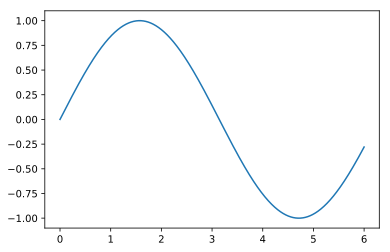

In [126]:
x = np.linspace(0,6,1000)
y = np.sin(x)
plt.plot(x,y)
plt.show() 
## actually not necessary here, 
## but needed in IPython 
#or from command line

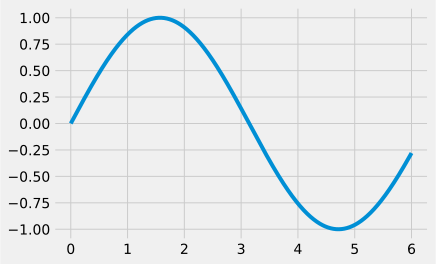

In [127]:
#It is possible to change the style as
with plt.style.context(
    'fivethirtyeight'):
    plt.plot(x,y);plt.ylim([-1.1,1.1])

<font size=4>`plt.style.use('style-name')` to change across all the notebook;`plt.style.available` to obtain all available styles. [More info here](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html).</font>

In [ ]:
import piplite
await piplite.install('seaborn')
await piplite.install('pycountry')
await piplite.install('pandas_datareader')

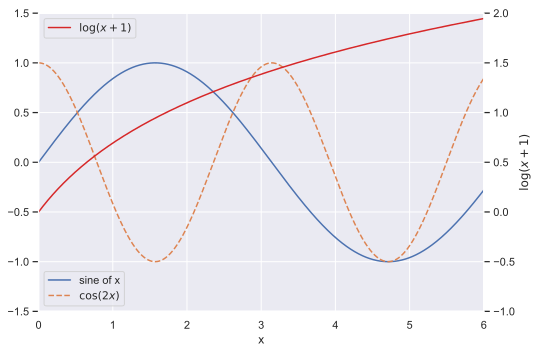

In [128]:
## Plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5.5)})
plt.plot(x,y);
plt.plot(x,np.cos(2*x),'--');
plt.xlabel('x');plt.legend(['sine of x','$\cos(2x)$'],loc='lower left');
plt.ylim((-1.5,1.5));
plt.twinx(); ## creates new y-axis
plt.plot(x,np.log(x+1),color = 'tab:red');
plt.grid(None)
plt.ylabel('$\log(x+1)$');plt.legend(['$\log(x+1)$']);
plt.ylim((-1,2));
plt.xlim((0,6));
# ## Export (Right click and download!)
plt.savefig('img/my_plot.png',dpi=500,transparent=True); 
# ## dpi = dots-per-inch; transparent sets alpha-channel to 0

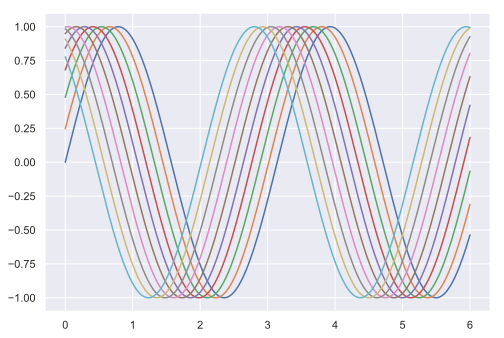

In [130]:
for k in range(10):
    plt.plot(x,np.sin(2*x+k/4));

#### Line Styles

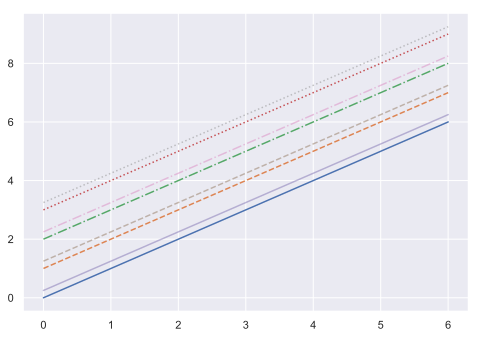

In [131]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');
# For short, you can use the following codes:
plt.plot(x, x + 0.25, linestyle='-',alpha= 0.5)  # solid
plt.plot(x, x + 1.25, linestyle='--',alpha= 0.5) # dashed
plt.plot(x, x + 2.25, linestyle='-.',alpha= 0.5) # dashdot
plt.plot(x, x + 3.25, linestyle=':',alpha= 0.5);  # dotted

#### Scatter Plots

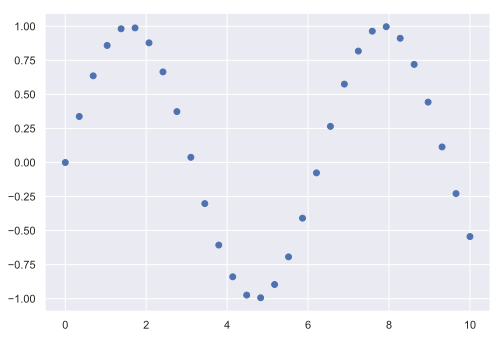

In [132]:
x = np.linspace(0, 10, 30) 
y = np.sin(x)
plt.plot(x, y, 'o');# '-o'

#### Markers

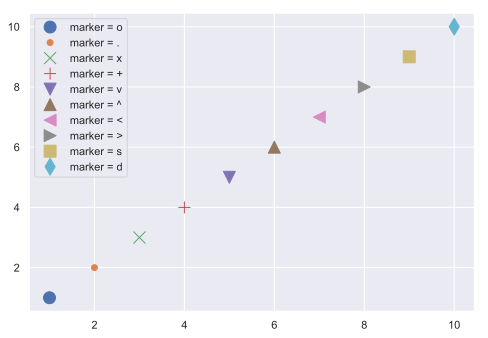

In [133]:
x=0
for marker in ['o', '.', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    x = x + 1
    plt.plot(x, x, marker,markersize=12,label="marker = " + marker)
plt.legend();

#### Alternatively, Scatter Plot with `plt.scatter`

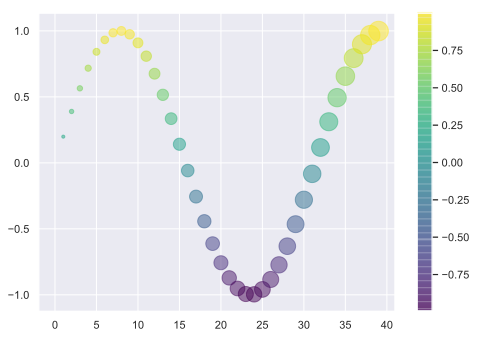

In [134]:
x = np.linspace(0,39,40)
y = np.sin(x/5)
colors = y
sizes = 10*x
plt.scatter(x,y,c=colors,cmap='viridis',s=sizes, alpha = 0.5)
plt.colorbar();  # show color scale

[More colormaps here](https://matplotlib.org/examples/color/colormaps_reference.html).

#### Histograms

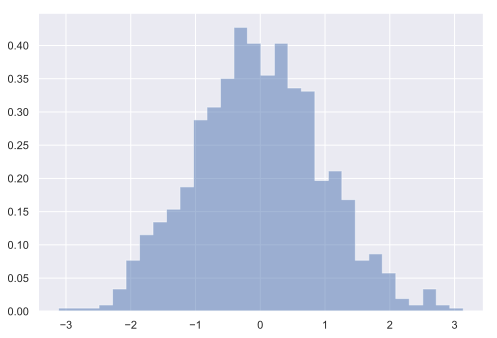

In [135]:
data = np.random.randn(1000)
plt.hist(data, bins=30, density=True, alpha=0.5,histtype='stepfilled');

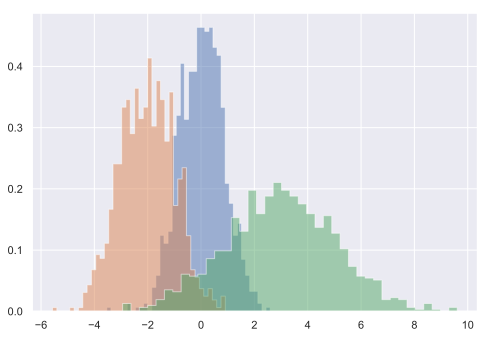

In [136]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

## by the way, we can pass the same options to multiple plots!
kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

#### Subplots - by hand

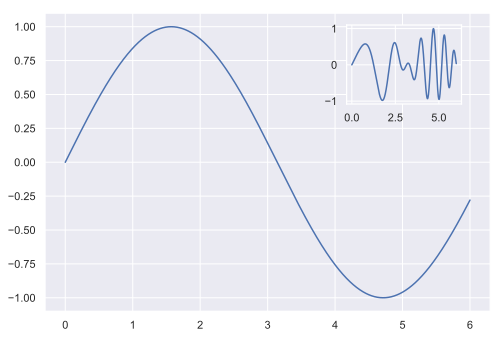

In [137]:
x = np.linspace(0, 6,1000)
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])
ax1.plot(x,np.sin(x));
ax2.plot(x,np.sin(x)*np.cos(x**2));

#### Subplots - with `plt.subplot`

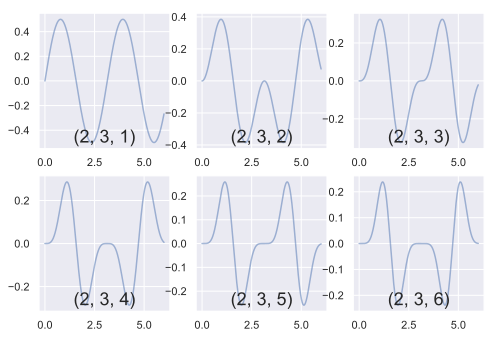

In [138]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    y=np.sin(x)**i*np.cos(x)
    plt.plot(x,y,alpha=0.5)
    plt.text(np.mean(x), min(y), str((2, 3, i)),
             fontsize=18, ha='center')

#### Subplots - or with `plt.subplots`

to share axis

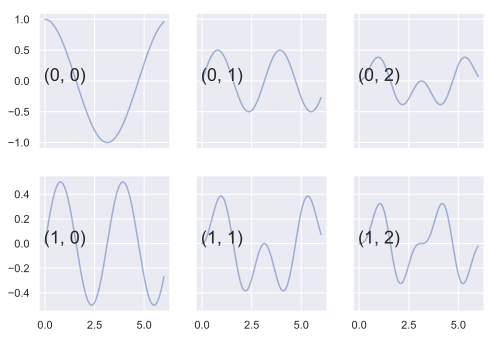

In [139]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2):
    for j in range(3):
        y=np.sin(x)**(i+j)*np.cos(x)
        ax[i, j].plot(x,y,alpha=0.5)
        ax[i, j].text(1, 0, str((i, j)),
                      fontsize=18, ha='center')

#### Subplots - or with `plt.GridSpec`

for more complicated arrangements

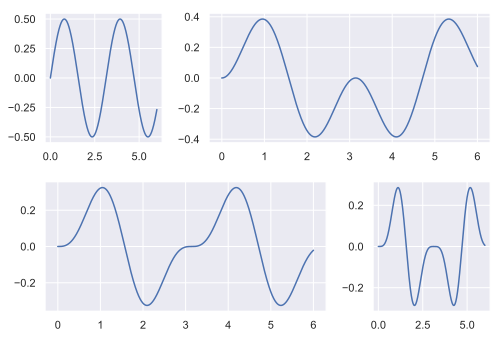

In [140]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.plot(x,np.sin(x)*np.cos(x))
plt.subplot(grid[0, 1:])
plt.plot(x,np.sin(x)**(2)*np.cos(x))
plt.subplot(grid[1, :2])
plt.plot(x,np.sin(x)**(3)*np.cos(x))
plt.subplot(grid[1, 2]);
plt.plot(x,np.sin(x)**(4)*np.cos(x));

#### A few more complicated plots

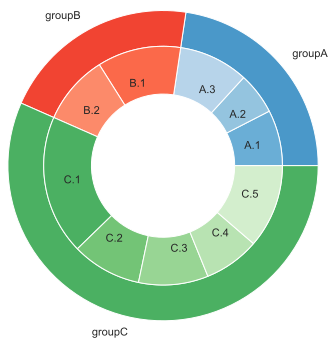

In [141]:
# Double donut
# Make data: consider 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
# First Ring (outside)
fig, ax = plt.subplots()
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, 
                  colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, 
                   labeldistance=0.7, 
                   colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), 
                           c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0) 

In [142]:
import pandas as pd
data = pd.read_csv('res/vulcano.csv')
# Transform data to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes

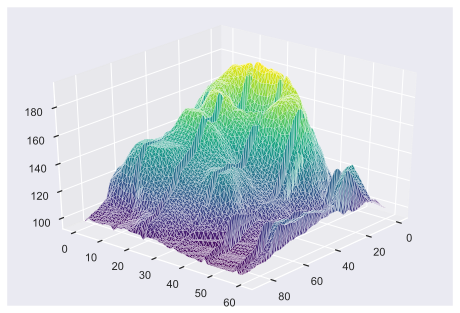

In [143]:
## prevents cell to print output
from mpl_toolkits.mplot3d import Axes3D

 
# for angle in range(0,360,1):
#     # Make the plot
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
 
#     # Set the angle of the camera
#     ax.view_init(30,angle)
#     # Save it
#     filename='./img/PNG/ANIMATION/Vulcano_step'+str(angle)+'.png'
#     plt.savefig(filename, dpi=180) 

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
# Set the angle of the camera
ax.view_init(30, 40) 

### A very brief tour of Seaborn

In [144]:
import pandas as pd
data = np.random.multivariate_normal(
    [0, 0], [[5, 2], [2, 2]],
    size=2000)
data = pd.DataFrame(
    data, columns=['x', 'y'])
data.head(5)

x         y
0 -3.419848 -1.690423
1  3.345526  2.305669
2 -0.730291  0.061556
3  3.070335  0.154755
4 -0.044977 -0.789151

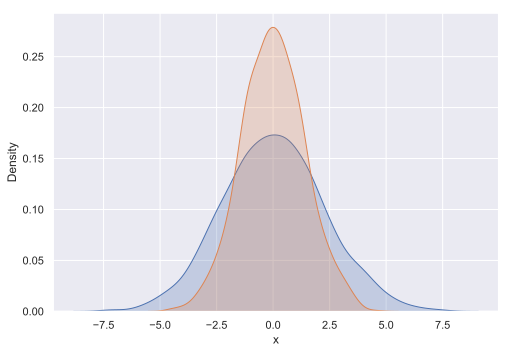

In [145]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

#### Visualise the joint distribution

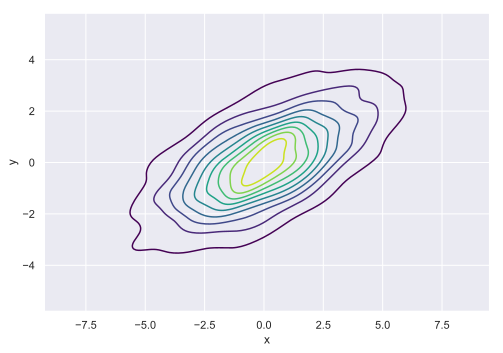

In [146]:
sns.kdeplot(x=data['x'], y=data['y'], 
            cmap='viridis');

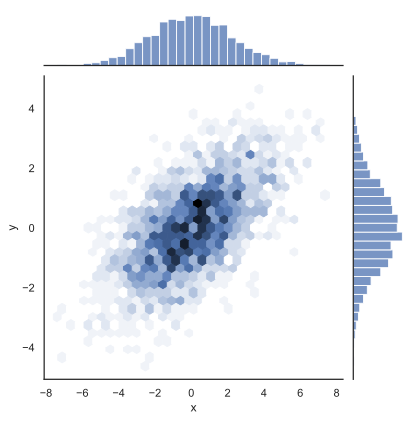

In [147]:
with sns.axes_style('white'):
    sns.jointplot(x="x", y="y", data=data, 
                  kind='hex'); 
# 'hex','kde'

In [147]:
tips = sns.load_dataset("tips")
tips.head()  # tips to restaurant staff

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


|Column| Description|
|--|--|
|total_bill| Total bill including tax [USD]|
|tip| Tip [USD]|
|sex| Sex of person paying|
|smoker| Smoker in party?|
|day |Day of the week|
|time |Time of the day|
|size|Size of the party|

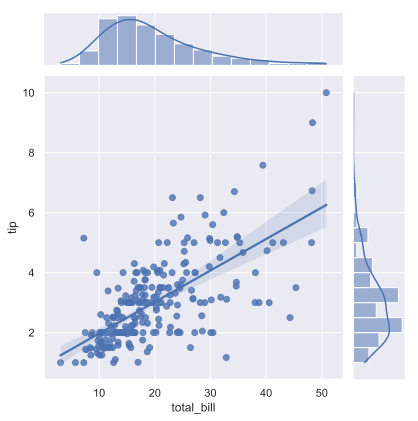

In [148]:
sns.jointplot(x="total_bill", y="tip",
              data=tips, kind="reg");

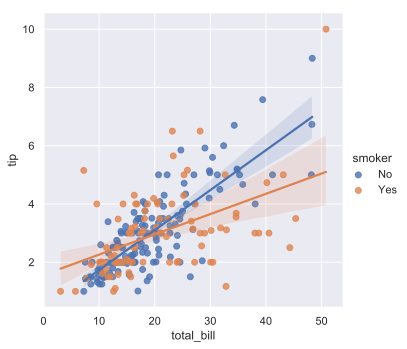

In [149]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

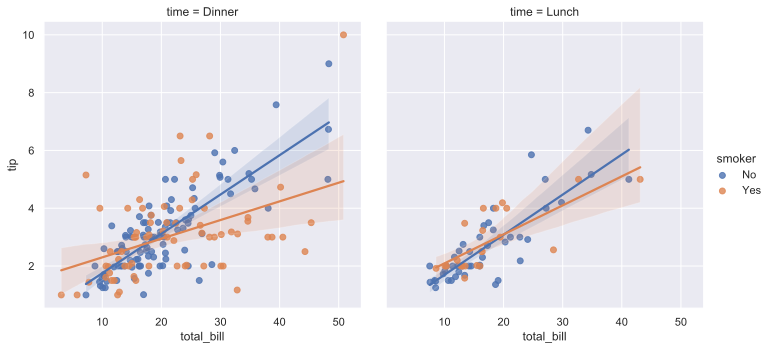

In [150]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

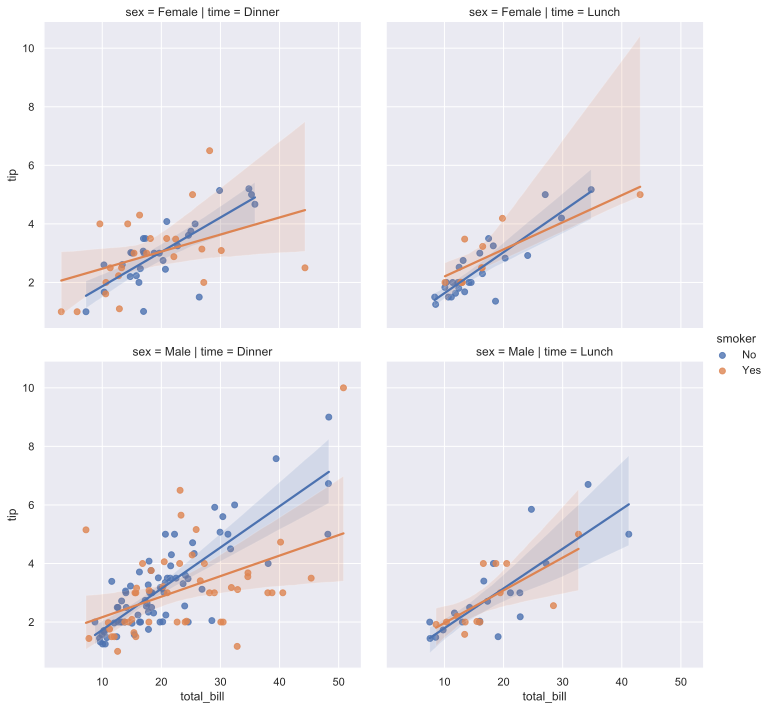

In [151]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",col="time", row="sex", data=tips);

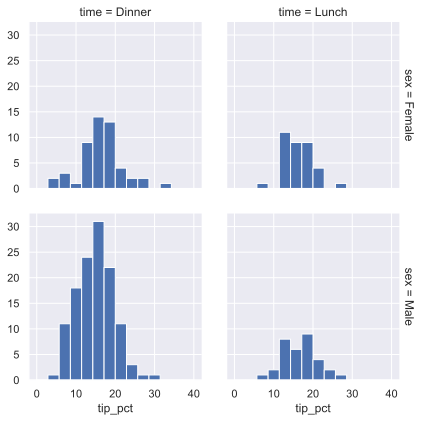

In [152]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

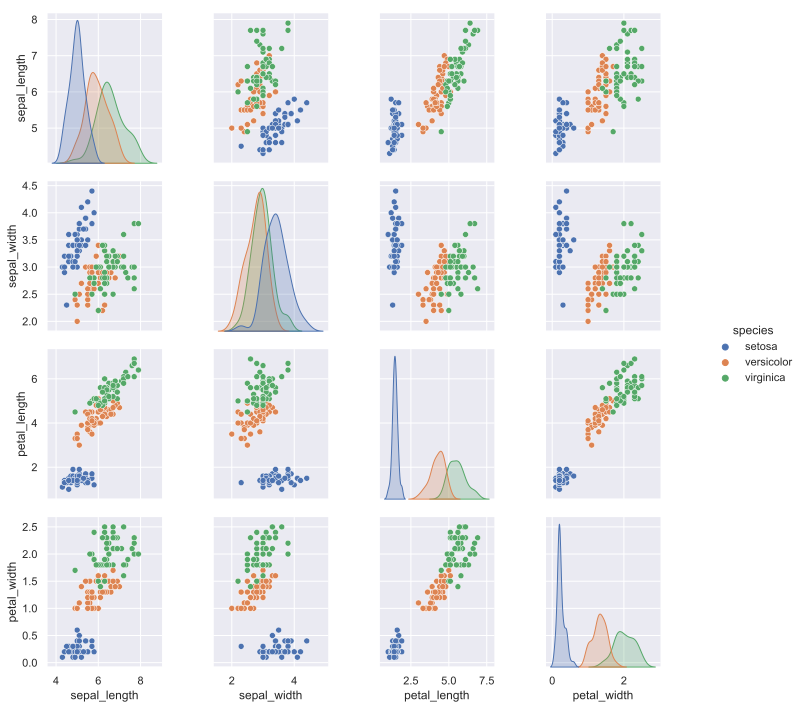

In [154]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species', height=2.5);

## Importing data from the web
### i.e. [Pandas' DataReader](https://pandas-datareader.readthedocs.io/en/latest/index.html)

#### Remote Data Access to:
- FRED
- World Bank
- OECD
- Eurostat
- Yahoo Finance
- ...

and [more](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html).

#### Suppose we want recent data on economic growth for the EU founder countries.

To download data from, say, the WorldBank, we must know the exact indicator of the data we want to read.

In [ ]:
from pandas_datareader import wb
# wb.search('gdp')
wb.search('gdp.*capita.*const').iloc[:,:2] 
###  `.*` indicates that any text in that position is a match

In [ ]:
gdp_pc_conts_idx = wb.search('gdp.*capita.*const').iloc[1,0]
gdp_pc_conts_idx 

We create a list of country indicators:

In [ ]:
countries = ['DE', 'FR', 'IT', 'NL', 'BE','LU']

In [ ]:
data = wb.download(indicator='NY.GDP.PCAP.KD',country=countries,start=1991, end=2018)
## rearrange data
GDP = data.reset_index().pivot('year','country')
GDP.head(4)

At this point, we can easily compute each country's growth as

In [ ]:
GROWTH = 100 * GDP.pct_change()
GROWTH.head(5)

(It is also possible to automatically generate a $\LaTeX$ table as 
`GROWTH.tail(6).round(2).to_latex('my_table.tex')`. This creates a file called `my_table.tex` in the current directory.)

Finally, we plot the results:

In [ ]:
GROWTH.columns = countries
GROWTH.plot(); 

In [ ]:
GROWTH.plot(subplots=True, 
        layout=[3,2], sharey=True);

#### Suppose we want to regress change in consumption (as Personal Consumption Expenditures) on the change in gdp:


$$\Delta\ln(c_t)=\alpha+\beta\Delta\ln(y_t)+\epsilon_t$$

In [ ]:
import pandas_datareader.data as web
usdata=web.DataReader(['PCEC','GDP'],
                  'fred', 1947, 2019)
usdata.head(8)

In [ ]:
usdata.plot();

In [ ]:
import statsmodels.formula.api as smf
smf.ols('PCEC ~ GDP', np.log(usdata).diff()).fit().summary() 

<font size=4>The sample covers a long period (~$70$y of quarterly observation), thus it is reasonable to wonder whether the parameters are constant.

Let us estimate with a rolling sample. In particular, consider 24 quarterly observations rolling window.</font>


In [ ]:
growth=(100*np.log(usdata).diff())[1:] 
T, _ = growth.shape ###---- T = # of observations
h = 24

In [ ]:
def window_β(k): return smf.ols('PCEC~GDP',growth[k-h:k]).fit().params['GDP']

In [ ]:
growth.loc[h-1:,'β'] = [window_β(k) for k in range(h,T+1)] 
growth[['β']].plot();

## Another example

In [ ]:
# AAPL AMZN and GOOGL stocks
from pandas_datareader import data
tickers = ['AAPL', 'AMZN', 'GOOGL']
start_date, end_date = '2010-01-01', '2019-05-10'
df = data.get_data_yahoo(tickers, start_date, end_date)
df.head()

In [ ]:
df['Close'].plot();

In [ ]:
##Plotting
amzn = df['Close']["AMZN"]
# Calculate moving averages of the closing prices rolling at 20 and 100 days 
roll1_amzn = amzn.rolling(window=20).mean()
roll2_amzn = amzn.rolling(window=100).mean()
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(amzn, label='AMZN')  
ax.plot(roll1_amzn, label='20 days rolling')
ax.plot(roll2_amzn, label='100 days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')
ax.legend();

### Choropleth Maps

In [ ]:
import pycountry
EU_countries = ["Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark",
                "Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Latvia",
                "Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia",
                "Slovenia","Spain","Sweden","United Kingdom"]
print(len(EU_countries) == 28)
countries = [pycountry.countries.get(name= country).alpha_2 for country in EU_countries]

In [ ]:
from pandas_datareader import wb
wb.search('gdp.*capita.*current').iloc[:,:2] 
###  `.*` indicates that any text in that position is 

In [ ]:
GDP = wb.download(indicator='NY.GDP.PCAP.CD',country=countries,start=2017, end=2017)
GDP = GDP.reset_index().drop(columns=['year'])## rearrange data
GDP = GDP.rename(columns = {'NY.GDP.PCAP.CD':'GDP'})
GDP.transpose()

In [ ]:
from datetime import date
import currency_converter as CC### Data from ECB
c = CC.CurrencyConverter()
usd_eur = c.convert(1,'EUR', 'USD', date=date(2017,3,21))
GDP['GDP'] /= usd_eur
GDP.transpose()

In [ ]:
cty_α_2 = []
for country in GDP['country']:
    try:
        cty_α_2.append(
            pycountry.countries.get(
                name= country).alpha_3)
    except:
        cty_α_2.append(
            pycountry.countries.get(
                official_name= country).alpha_3)
GDP['country'] = cty_α_2
GDP.transpose()

In [ ]:
## Choropleth
import folium
from branca import colormap

map_data = pd.DataFrame({
    'A3': list(GDP['country']),
    'value': list(GDP['GDP']/1000)
})

map_dict = map_data.set_index('A3')['value'].to_dict()
vmin = min(map_dict.values())
vmax = max(map_dict.values())
color_scale = colormap.linear.Blues_09.scale(vmin, vmax )
###### try dir(colormap.linear) for more colormaps
# color_scale = colormap.LinearColormap(['azure','darkblue'], vmin = vmin, vmax = vmax)
# color_scale = colormap.LinearColormap(['yellow','red'], vmin = vmin, vmax = vmax)
color_scale = color_scale.to_step(index=range(0,100,5))# 0,70,10
color_scale.caption = 'GDP per capita [K€]'

def get_color(feature,border = False):
    value = map_dict.get(feature['properties']['A3'])
    if not border:### SET FILLING COLOR
        if value is None:
            return '#DDDDDD' # MISSING -> gray
#             return 'white'  # MISSING -> white
        else:
            return color_scale(value)
    else:         ### SET BORDER COLOR
        if value is None:
            return None # MISSING -> no color
        else:
            return 'black'

m = folium.Map(
    tiles=None, #Stamen Terrain, OpenStreetMap, Stamen Toner, Mapbox Bright, and Mapbox Control Room
    location = [50, 15], 
    zoom_start = 4
)  
folium.GeoJson(
    data = './res/world_geo.json_files/coastline_cty_10km.geo.json',
    style_function = lambda feature: {
        'fillColor': get_color(feature),
        'fillOpacity': 0.7,
        'color' : get_color(feature,border = True),
        'weight' : 1,
    }    
).add_to(m)
m.add_child(color_scale)

In [ ]:
m

In [ ]:
m.save('map.html')

# End of Lecture 2